## Cononical First and Second Order (CT) Systems

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# First Order Cononical Systems

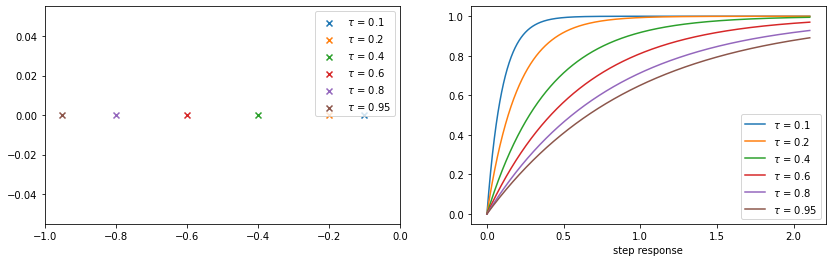

In [7]:
taus = np.asarray([0.1, 0.2, 0.4, 0.6, 0.8, 0.95])
max_tau = np.max(taus)
t = np.arange(0, 2/max_tau, 0.001)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
for i, tau in enumerate(taus):
    ax[0].scatter([-tau], [0], marker='x', label=fr'$\tau$ = {tau}')
    ax[0].grid(linestyle=':')
    ax[0].set_xlim([-1, 0])
    ax[0].legend()

    ax[1].plot(t, 1 - np.exp(-t / tau), label=fr'$\tau$ = {tau}')
    ax[1].set_xlabel('t')
    ax[1].set_xlabel('step response')
    ax[1].grid(linestyle=':')
    ax[1].legend()

# Second Order Cononical Systems

In [16]:
def step_response_2nd(eta, omega_n, t):
    if eta >= 1:
        radical = np.sqrt(eta * eta - 1)
    else:
        radical = 1j * np.sqrt(1 - eta * eta)

    M = omega_n / ( 2 * radical )
    p_plus = -eta * omega_n + omega_n * radical
    p_minus = -eta * omega_n - omega_n * radical

    response = 1 + M * ( np.exp(p_plus * t) / p_plus - np.exp(p_minus * t) / p_minus)
    return response.real

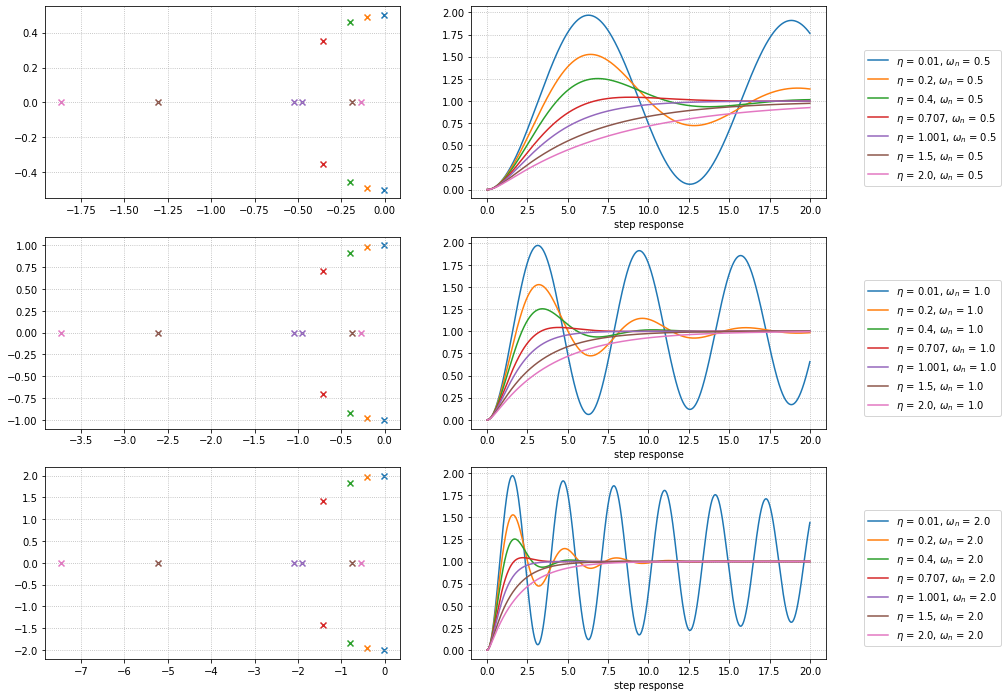

In [24]:
wns = np.asarray([0.5, 1.0, 2.0])
damps = np.asarray([0.01, 0.2, 0.4, 0.707, 1.001, 1.5, 2])

min_wn = np.min(wns)

t = np.arange(0, 10 / min_wn, 0.001)

N_rows = len(wns)
fig, ax = plt.subplots(N_rows, 2, figsize=(14, 4 * N_rows))

omega_n = 2
for k, omega_n in enumerate(wns):
    for i, eta in enumerate(damps):
        if eta >= 1:
                radical = np.sqrt(eta * eta - 1)
        else:
            radical = 1j * np.sqrt(1 - eta * eta)

        p_plus = -eta * omega_n + omega_n * radical
        p_minus = -eta * omega_n - omega_n * radical    
        
        ax[k][0].scatter([p_plus.real, p_minus.real], [p_plus.imag, p_minus.imag], marker='x', label=fr'$\eta$ = {eta}, $\omega_n$ = {omega_n}')
        ax[k][0].grid(linestyle=':')
        # ax[0].set_xlim([-1, 0])
        # ax[0].legend()

        ax[k][1].plot(t, step_response_2nd(eta, omega_n, t), label=fr'$\eta$ = {eta}, $\omega_n$ = {omega_n}')
        ax[k][1].set_xlabel('t')
        ax[k][1].set_xlabel('step response')
        ax[k][1].grid(linestyle=':')
        ax[k][1].legend(loc='upper center', bbox_to_anchor=(1.3, 0.8), ncol=1)

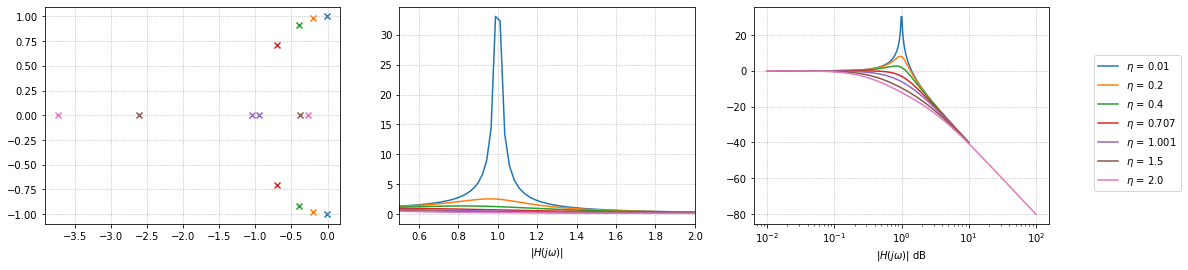

In [36]:
import scipy.signal as signal

## same as normalizing omega by omega_n
omega_n = 1
damps = np.asarray([0.01, 0.2, 0.4, 0.707, 1.001, 1.5, 2])

b = [1]

fig, ax = plt.subplots(1, 3, figsize=(18, 4))

for i, eta in enumerate(damps):
    if eta >= 1:
            radical = np.sqrt(eta * eta - 1)
    else:
        radical = 1j * np.sqrt(1 - eta * eta)

    p_plus = -eta * omega_n + omega_n * radical
    p_minus = -eta * omega_n - omega_n * radical    
    
    ax[0].scatter([p_plus.real, p_minus.real], [p_plus.imag, p_minus.imag], marker='x', label=fr'$\eta$ = {eta}, $\omega_n$ = {omega_n}')
    ax[0].grid(linestyle=':')

    a = [1, 2 * eta, 1]
    omega, H = signal.freqs(b,a)
    mag_H = np.abs(H)

    ax[1].plot(omega, mag_H, label=fr'$\eta$ = {eta}')
    ax[1].set_xlabel(r'$\omega$ (read/sec)')
    ax[1].set_xlabel(r'$|H(j\omega)|$')
    ax[1].grid(linestyle=':')
    ax[1].set_xlim([0.5, 2])
    # ax[1].legend(loc='upper center', bbox_to_anchor=(1.3, 0.8), ncol=1)

    ax[2].semilogx(omega, 20 * np.log10(mag_H), label=fr'$\eta$ = {eta}')
    ax[2].set_xlabel(r'$\omega$ (read/sec)')
    ax[2].set_xlabel(r'$|H(j\omega)|$ dB')
    ax[2].grid(linestyle=':')
    ax[2].legend(loc='upper center', bbox_to_anchor=(1.3, 0.8), ncol=1)